# 1_ag26lab.ipynb

# jacobjohnson22

numerically calculates the average power for an AC waveform input

In [19]:
!pip install numpy matplotlib

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
twopi = 2*np.pi

f           = 60                        #frequency
T           = 1/f                       #period in seconds
t_i         = 0                         #initial time
t_f         = 2*T                       #final time
num_samples = 100                       #number of samples
d_t         = (t_f - t_i) / num_samples #time resolution
v_p         = 12                        #peak voltage (volts)
i_p         = v_p/120                   #peak current (amps)

In [22]:
t    = np.array([(t_i + d_t*n) for n in range(num_samples)])    #time (s)
t_ms = 1000*t                                                   #time (ms)
v    = v_p * np.sin(twopi*f*t)                                  #voltage[time] (volts)
i    = i_p * np.sin(twopi*f*t)                                  #current[time] (amps)
p    = v*i                                                      #power[time] (watts)

In [23]:
d_e   = np.pad((d_t/2)*(p[1:] + p[:-1]), (1,0), 'constant', constant_values=(0.0,))    #delta energy
ey    = d_e.cumsum()                #energy (Joules)
ey_m  = ey*1000                     #energy (milliJoules)

In [24]:
p_avg = ey_m[-1] / (t_f - t_i)      #average power
print("---------------------")
print(f'Pave= Em[tf]/tf = {p_avg} (mW)')
print("---------------------")

---------------------
Pave= Em[tf]/tf = 599.9057494833858 (mW)
---------------------


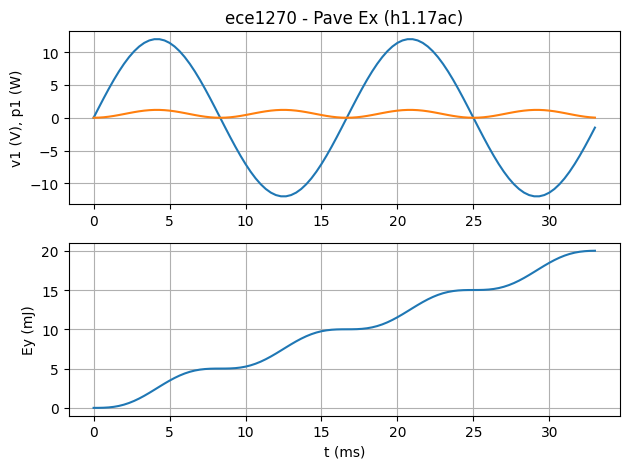

In [25]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(t_ms, v, t_ms, p)
axs[0].set_title('ece1270 - Pave Ex (h1.17ac)')
axs[0].set_ylabel('v1 (V), p1 (W)')
axs[0].grid(True)
axs[1].plot(t_ms, ey_m)
axs[1].set_ylabel('Ey (mJ)')
axs[1].set_xlabel('t (ms)')
axs[1].grid(True)
fig.tight_layout()
plt.show()